# Linear Regression on Boston housing dataset

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

c:\users\sunya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
import pandas as pd
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target, columns=["Price"])

In [35]:
df_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [36]:
df_y

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


# Data preprocessing

In [20]:
## check is it has null value
df_x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# Data exploration

In [66]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

sns.set_style('whitegrid')

c:\users\sunya\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


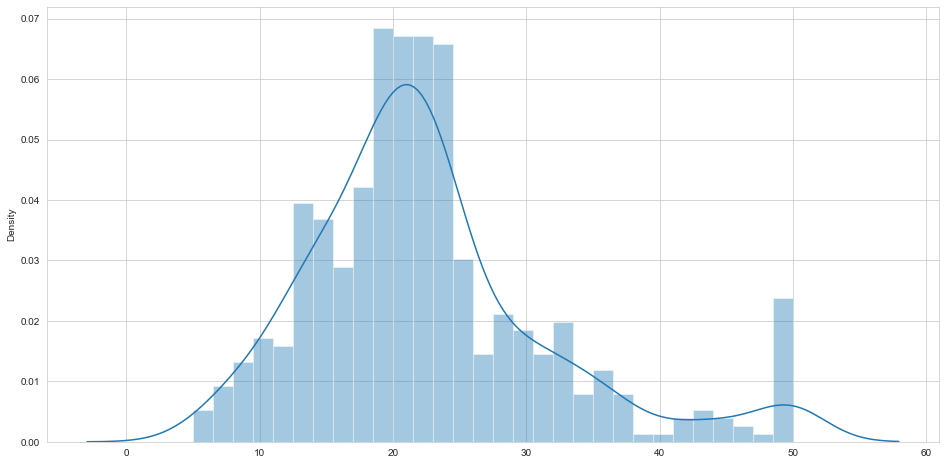

In [67]:
plt.figure(figsize=(16,8))
sns.distplot(df_y, bins=30)
plt.show()

In [33]:
df_y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [38]:
data = pd.concat([df_y,df_x],axis=1)

In [39]:
data.head()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


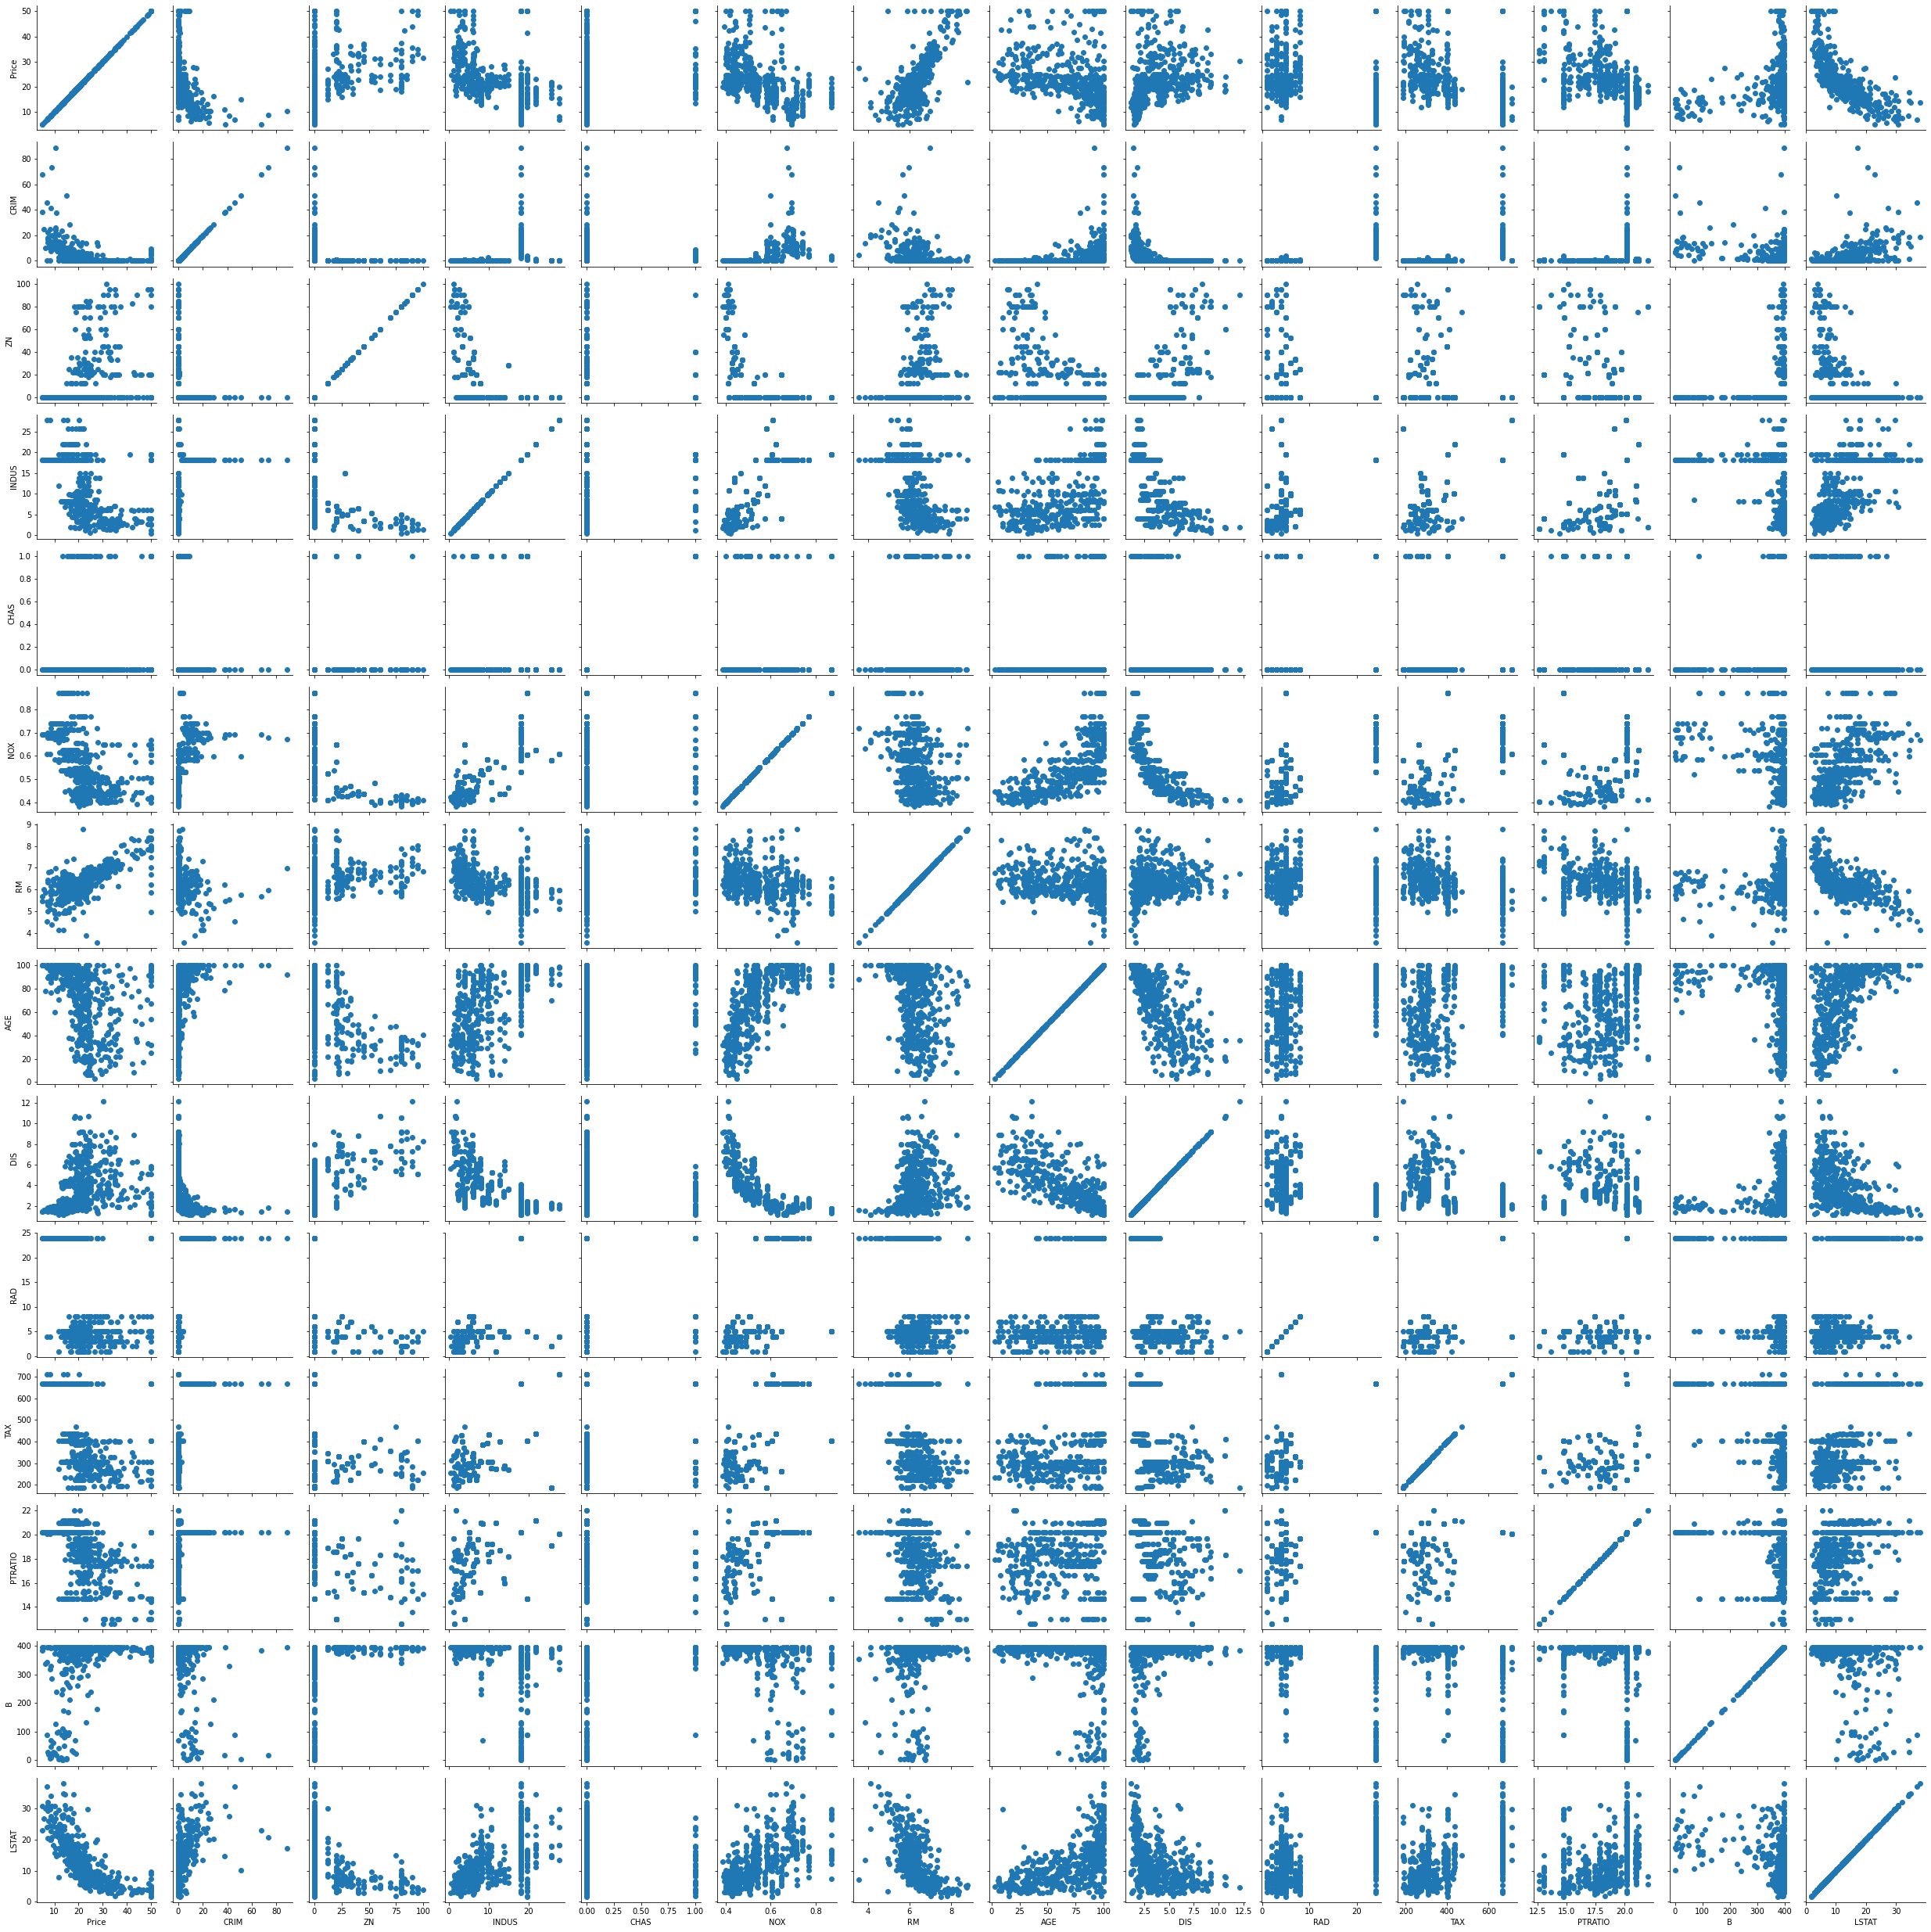

In [41]:
g = sns.PairGrid(data)
g.map(plt.scatter)

In [42]:
## heat map for correlation 
def plot_corr_map(df):
    corr=df.corr()
    _,ax=plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220, 10, as_cmap=True)
    _=sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink':0.9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize':12}
    )

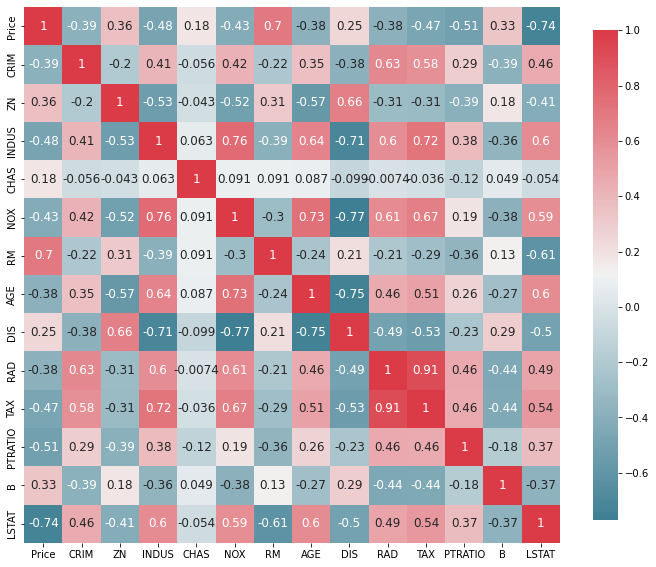

In [43]:
plot_corr_map(data)

# Build Regression Model

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

## Selecting some features 

In [73]:
df_x_features = df_x[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT']]

In [74]:
X_train,X_test,y_train,y_test = train_test_split(df_x_features, df_y, test_size=0.2, random_state=0)

In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pr = lr.predict(X_test)

In [76]:
lr.intercept_

array([23.26796835])

In [77]:
print('coefficient: ', lr.coef_[0])
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pr)))
scores = cross_val_score(lr, X_train, y_train, cv=10)
print("Cross-validation score:{}".format(scores.mean()))

coefficient:  [-9.76186015e-02 -2.38495998e-03  2.27787254e-02 -9.48061880e+00
  4.40055427e+00  2.38891457e-02  9.04422470e-02 -1.22827111e+00
  9.63403886e-03 -4.95132662e-01]
RMSE:  6.307068382192902
Cross-validation score:0.6984840630279903


## Residual plot

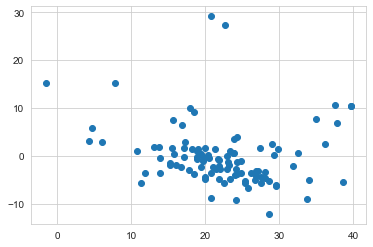

In [68]:
plt.scatter(y_pr, y_test-y_pr)
plt.show()

## Select all features

In [78]:
X_train,X_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pr = lr.predict(X_test)

In [80]:
print('coefficient: ', lr.coef_[0])
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pr)))
scores = cross_val_score(lr, X_train, y_train, cv=10)
print("Cross-validation score:{}".format(scores.mean()))

coefficient:  [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]
RMSE:  5.783509315085128
Cross-validation score:0.7310126345738179


# In conclusion
It's better to use all the features from datasets 